# Proyek Analisis Data: Nama dataset
- Nama: Arif Munandar
- Email: arifmunandar.che@gmail.com
- Id Dicoding: arif_munandar

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Bagaimana jumlah distribusi sepeda dalam beberapa bulan terakhir?
- pertanyaan 2: Pada musim apa yang paling banyak dan paling sedikit distribusi sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

D:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Data Wrangling

### Gathering Data

In [46]:
df_bike_day = pd.read_csv('../Bike-sharing/day.csv')
df_bike_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**Menilai tabel `df_bike_day`**

In [47]:
df_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [48]:
df_bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [49]:
df_bike_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
print("Jumlah duplikasi: ", df_bike_day.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
df_bike_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [52]:
df_bike_day.shape

(731, 16)

In [53]:
df_bike_day.drop_duplicates().shape

(731, 16)

### Cleaning Data

Setelah kita melihat pada dataset dapat diketahui bahwa kolom `dteday` dan `instant` 
After looking at data set we clearly see that date column and instant (index) are not required features.

In [54]:
df_bike_day.drop(['dteday'], axis=1,inplace=True)

Kemudian kita juga akan menghilangkan kolom `holiday` karena berlawanan dengan kolom `workingday` dan cukup menggunakan salah satu saja
We can also drop holiday because it opposite of workingday and one such feature is enough.

In [55]:
df_bike_day.drop(['holiday'], axis=1,inplace=True)

**Mengubah nama atribut pada `df_bike_day` agar mudah dipahami**

In [56]:
df_bike_day.rename(columns={'yr':'year','mnth':'month','weekday':'week_day',
                   'workingday':'working_day','weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)

In [57]:
df_bike_day.head(5)

,instant,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [58]:
# Categorical
df_bike_day['season']=df_bike_day.season.astype('category')
df_bike_day['working_day']=df_bike_day.working_day.astype('category')
df_bike_day['week_day']=df_bike_day.week_day.astype('category')
df_bike_day['weather_situation']=df_bike_day.weather_situation.astype('category')
df_bike_day['month']=df_bike_day.month.astype('category')
df_bike_day['year']=df_bike_day.year.astype('category')

In [59]:
df_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   instant            731 non-null    int64   
 1   season             731 non-null    category
 2   year               731 non-null    category
 3   month              731 non-null    category
 4   week_day           731 non-null    category
 5   working_day        731 non-null    category
 6   weather_situation  731 non-null    category
 7   temp               731 non-null    float64 
 8   temp_feel          731 non-null    float64 
 9   humidity           731 non-null    float64 
 10  wind_speed         731 non-null    float64 
 11  casual             731 non-null    int64   
 12  registered         731 non-null    int64   
 13  count              731 non-null    int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 51.4 KB


## Exploratory Data Analysis (EDA)

### Explore `df_bike_day`

In [60]:
# membuat duplikat untuk exploratory
df_explore=df_bike_day.copy(deep=True)

In [61]:
df_explore.sample(5)

,instant,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
426,427,1,1,3,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194
650,651,4,1,10,5,1,1,0.437500,0.433071,0.539167,0.235092,1060,6222,7282
7,8,1,0,1,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
199,200,3,0,7,2,1,1,0.776667,0.747479,0.650417,0.130600,752,3789,4541
664,665,4,1,10,5,1,2,0.545833,0.522750,0.807083,0.132467,1182,6262,7444


In [62]:
df_explore.describe()

,instant,temp,temp_feel,humidity,wind_speed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [63]:
# mengubah isi dari kolom season atau musim agar mudah dipahami
season_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
df_explore['season'] = df_explore['season'].map(season_codes)

In [64]:
df_explore.season.value_counts()

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64

In [65]:
# menubah isi dari kolom weather atau cuaca
weathersit_codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df_explore['weather_situation'] = df_explore['weather_situation'].map(weathersit_codes)

In [66]:
df_explore.weather_situation.value_counts()

weather_situation
Clear         463
Mist          247
Light Snow     21
Name: count, dtype: int64

In [67]:
working_codes = {1:'working_day',0:'holiday'}
df_explore['working_day'] = df_explore['working_day'].map(working_codes)

In [68]:
df_explore['working_day'].value_counts()

working_day
working_day    500
holiday        231
Name: count, dtype: int64

In [69]:
month_codes = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df_explore['month'] = df_explore['month'].map(month_codes)

In [70]:
df_explore['month'].value_counts()

month
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     57
Name: count, dtype: int64

In [71]:
weekday_codes = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_explore['week_day'] = df_explore['week_day'].map(weekday_codes)

In [72]:
df_explore['week_day'].value_counts()

week_day
Monday       105
Tuesday      105
Sunday       105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Name: count, dtype: int64

In [73]:
yr_codes = {0:"2011",1:"2012"}
df_explore['year'] = df_explore['year'].map(yr_codes)

In [74]:
df_explore['year'].value_counts()

year
2012    366
2011    365
Name: count, dtype: int64

In [75]:
df_explore.head()

,instant,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,spring,2011,January,Sunday,holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,spring,2011,January,Monday,holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,spring,2011,January,Tuesday,working_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,spring,2011,January,Wednesday,working_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,spring,2011,January,Thursday,working_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memisahkan antara kolom bertipe continous dan categorical

In [76]:
continous_col=['instant','temp','temp_feel','humidity','wind_speed','casual','registered']
categorical_col=['season','year','month','week_day','working_day','weather_situation']
target=['count']
print("Total columns =", len(continous_col)+len(categorical_col)+len(target))

Total columns = 14


In [77]:
df_explore.groupby(by=["season", "weather_situation"]).agg({
    "casual": "sum",
    "count": "sum"
})

casual   count
season weather_situation                
spring Clear               41562  312036
       Mist                18779  155573
       Light Snow            281    3739
summer Clear              146388  626986
       Mist                56714  288096
       Light Snow            420    3507
fall   Clear              167945  799443
       Mist                56407  250679
       Light Snow           1739   11007
winter Clear               90451  519487
       Mist                37876  302510
       Light Snow           1455   19616

<AxesSubplot:>

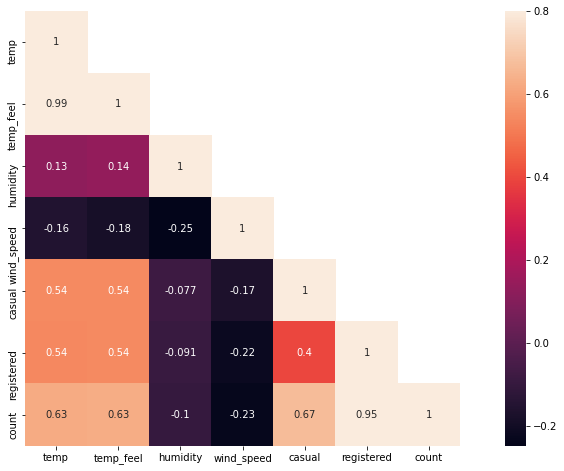

In [78]:
corrMatt = df_explore[['temp',
                    'temp_feel', 
                    'humidity', 
                    'wind_speed', 
                    'casual', 
                    'registered', 
                    'count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots(figsize=(16,8))
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

In [79]:
df_explore.to_csv("../Proyek Akhir/all_data_v1.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah distribusi sepeda dalam beberapa bulan terakhir?

In [35]:
df_explore.sample(5)

,instant,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
199,200,fall,2011,July,Wed,working_day,Clear,0.776667,0.747479,0.650417,0.130600,752,3789,4541
410,411,spring,2012,Feb,Thu,working_day,Clear,0.348333,0.351629,0.531250,0.181600,141,4028,4169
123,124,summer,2011,May,Thu,working_day,Mist,0.414167,0.404650,0.737083,0.328996,255,2378,2633
610,611,fall,2012,Sep,Mon,holiday,Mist,0.696667,0.649000,0.815000,0.064071,2613,3197,5810
532,533,summer,2012,June,Sun,holiday,Clear,0.631667,0.594708,0.504167,0.166667,2963,4739,7702


In [36]:
df = df_explore[df_explore['year']=='2011']

[Text(0.5, 1.0, 'Year-wise distribution of raidership counts 2011')]

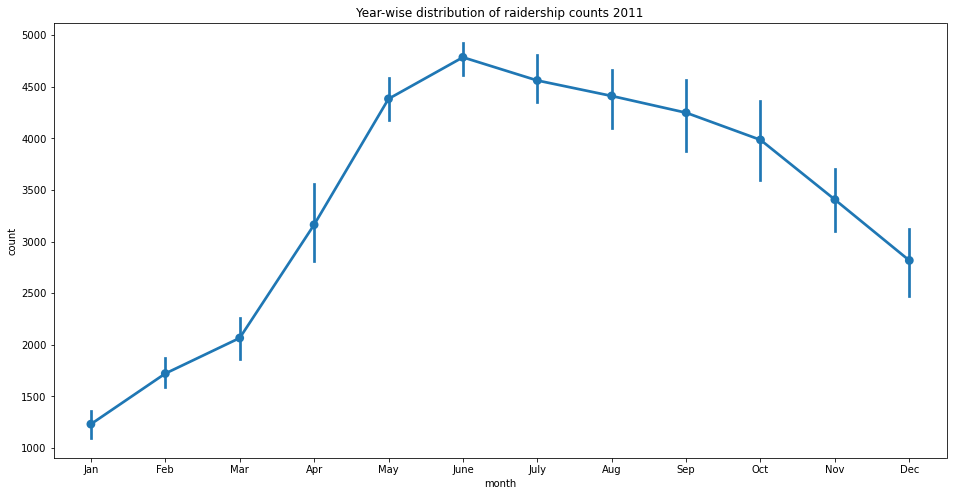

In [37]:
fig,ax=plt.subplots(figsize=(16,8))
sns.pointplot(data=df[['month','count']],x='month',y='count',ax=ax)
ax.set(title='Year-wise distribution of raidership counts 2011')


[Text(0.5, 1.0, 'Year-wise distribution of raidership counts 2012')]

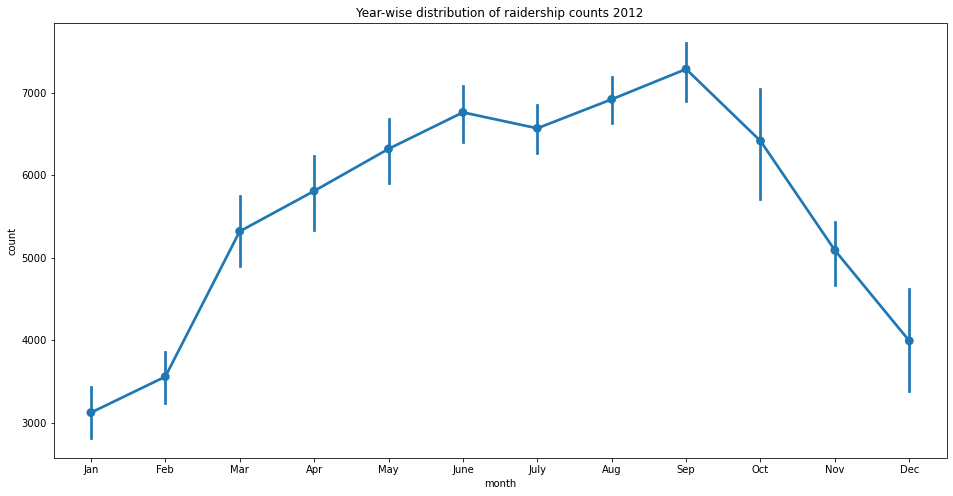

In [38]:
df_ = df_explore[df_explore['year']=='2012']
fig,ax=plt.subplots(figsize=(16,8))
sns.pointplot(data=df_[['month','count']],x='month',y='count',ax=ax)
ax.set(title='Year-wise distribution of raidership counts 2012')

[Text(0.5, 1.0, 'Weekday wise monthly distribution of raidership counts at 2011')]

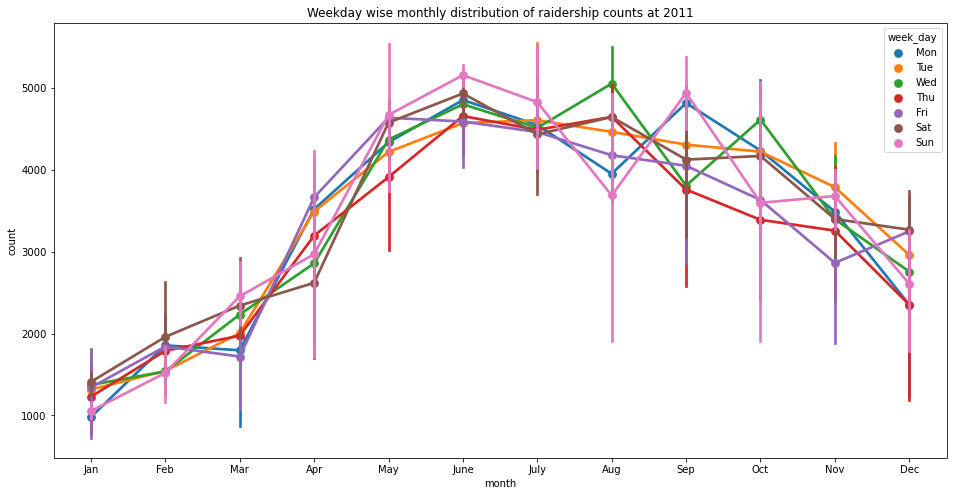

In [39]:
fig,ax=plt.subplots(figsize=(16,8))
sns.pointplot(data=df[['month','count','week_day']],x='month',y='count',
            hue='week_day',ax=ax)
ax.set(title='Weekday wise monthly distribution of raidership counts at 2011')

[Text(0.5, 1.0, 'Weekday wise monthly distribution of raidership counts at 2012')]

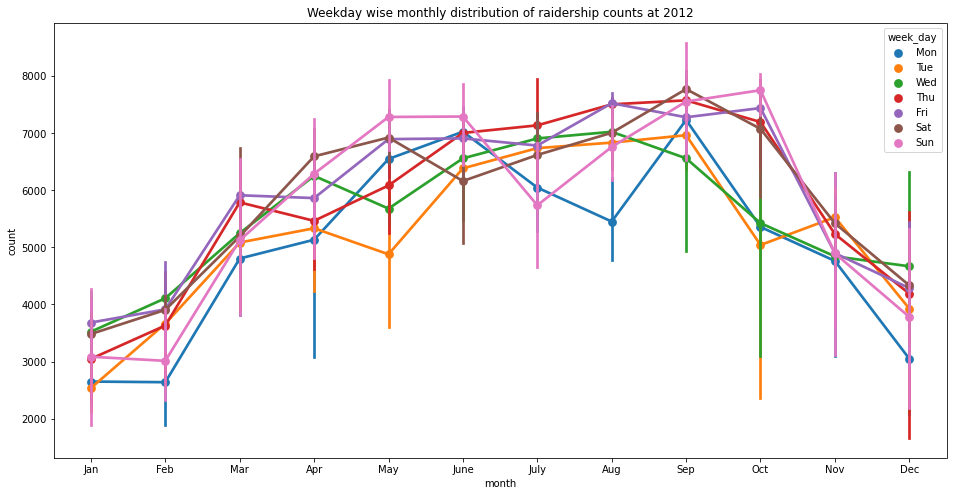

In [40]:
fig,ax=plt.subplots(figsize=(16,8))
sns.pointplot(data=df_[['month','count','week_day']],x='month',y='count',
            hue='week_day',ax=ax)
ax.set(title='Weekday wise monthly distribution of raidership counts at 2012')

[Text(0.5, 1.0, 'Month-wise raidership distribution at 2011')]

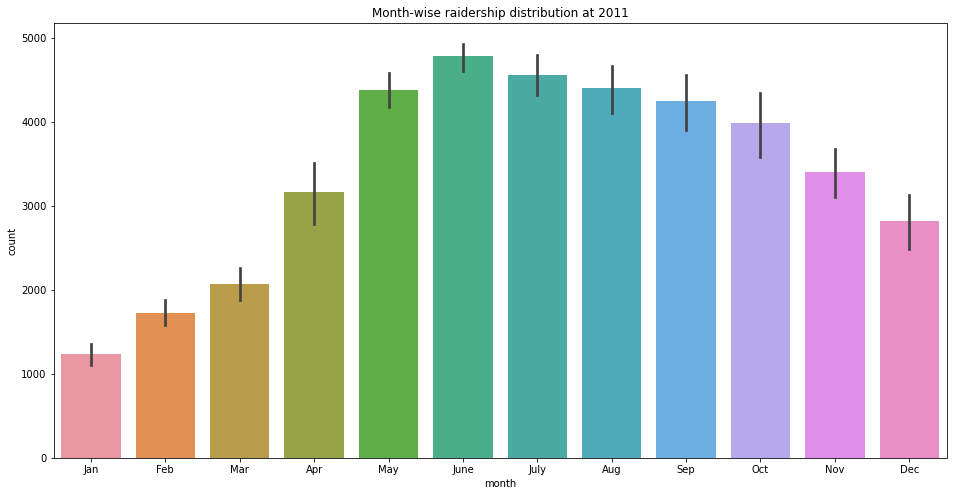

In [41]:
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=df[['month','count']],x='month',y='count',ax=ax)
ax.set(title='Month-wise raidership distribution at 2011')

[Text(0.5, 1.0, 'Month-wise raidership distribution at 2012')]

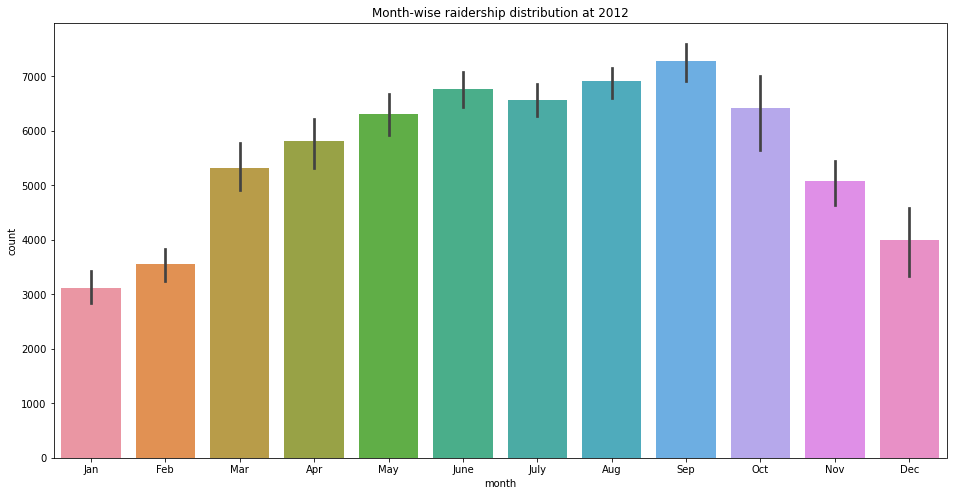

In [42]:
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=df_[['month','count']],x='month',y='count',ax=ax)
ax.set(title='Month-wise raidership distribution at 2012')

### Pertanyaan 2: Pada musim apa yang paling banyak dan paling sedikit distribusi sepeda?

**Melihat jumlah distribusi sepeda paling banyak dan paling sedikit pada tahun 2011**

In [59]:
df_max = df.groupby(by="season").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()
df_max

,season,count
0,fall,419650
1,summer,347316
2,winter,326137
3,spring,150000


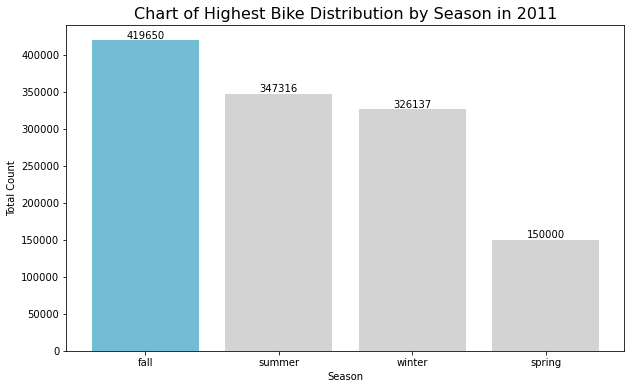

In [60]:
# Membuat plot batang
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.bar(df_max["season"], df_max["count"], color=colors)
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.title("Chart of Highest Bike Distribution by Season in 2011", fontsize=16)

# Menambahkan label pada batang
for i, count in enumerate(df_max["count"]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [61]:
df_min = df.groupby(by="season").agg({
    "count": "sum"
}).sort_values(by="count", ascending=True).reset_index()
df_min

,season,count
0,spring,150000
1,winter,326137
2,summer,347316
3,fall,419650


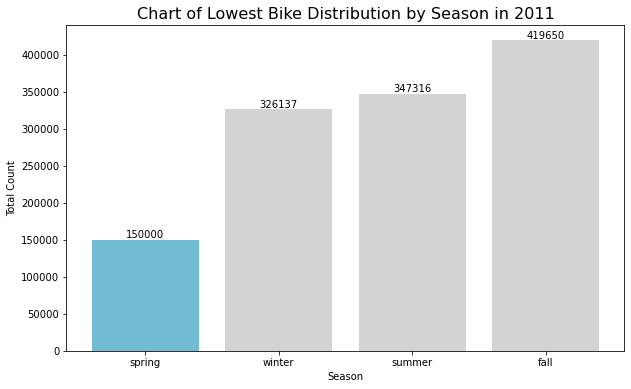

In [62]:
# Membuat plot batang
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.bar(df_min["season"], df_min["count"], color=colors)
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.title("Chart of Lowest Bike Distribution by Season in 2011", fontsize=16)

# Menambahkan label pada batang
for i, count in enumerate(df_min["count"]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

**Melihat jumlah distribusi sepeda paling banyak dan paling sedikit pada tahun 2012**

In [65]:
df_max_ = df_.groupby(by="season").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()
df_max_

,season,count
0,fall,641479
1,summer,571273
2,winter,515476
3,spring,321348


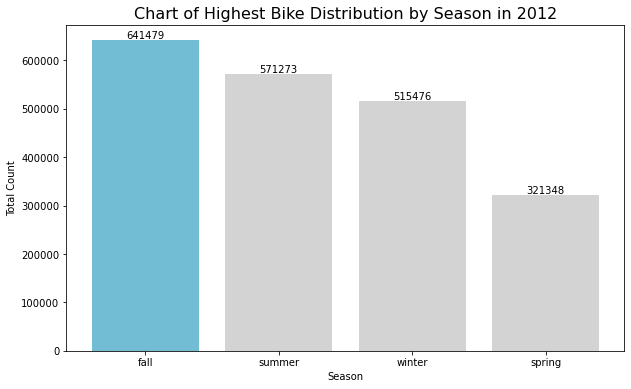

In [66]:
# Membuat plot batang
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.bar(df_max_["season"], df_max_["count"], color=colors)
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.title("Chart of Highest Bike Distribution by Season in 2012", fontsize=16)

# Menambahkan label pada batang
for i, count in enumerate(df_max_["count"]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [67]:
df_min_ = df_.groupby(by="season").agg({
    "count": "sum"
}).sort_values(by="count", ascending=True).reset_index()
df_min_

,season,count
0,spring,321348
1,winter,515476
2,summer,571273
3,fall,641479


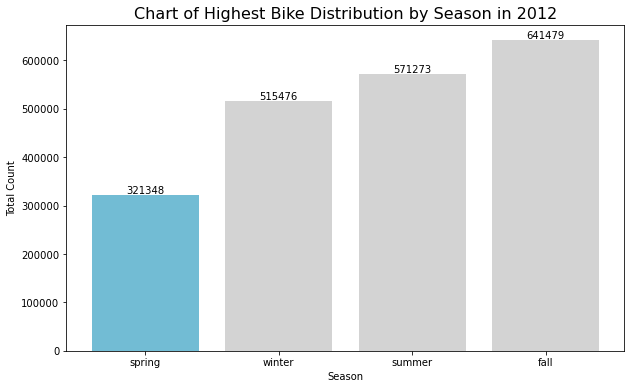

In [68]:
# Membuat plot batang
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.bar(df_min_["season"], df_min_["count"], color=colors)
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.title("Chart of Highest Bike Distribution by Season in 2012", fontsize=16)

# Menambahkan label pada batang
for i, count in enumerate(df_min_["count"]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## Conclusion

- Conclution pertanyaan 1: 
Berdasarkan grafik yang telah ditampilkan, dapat diketahui bahwa jumlah distribusi terbanyak pada beberapa bulan terakhir pada tahun 2011 adalah terjadi pada bulan juli. Sedangkan pada tahun 2012 jumlah distribusi terbanyal terjadi pada bulan september.

- Conclution pertanyaan 2: 
Berdasarkan grafik yang telah ditampilkan, dapat diketahui bahwa jumlah distribusi tertinggi berdasarkan musim pada tahun 2011 adalah terjadi pada musim fall/gugur dan untuk distribusi terendah terjadi pada musim spring. Kemudian pada tahun berikutnya yakni tahun 2012 jumlah distribusi tertinggi dan terendah sama seperti tahun sebelumnya.